In [1]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import my_utils as mu
import models as models
import torch
from torch import nn
import torch.utils.data as data_utils
from IPython import display
import math
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, ConcatDataset

In [3]:
path = '/content/drive/MyDrive/Data/MM_tens_data'
data = torch.load(path)

gen_data_path = '/content/drive/MyDrive/Data/MM_gen_latents_lat25_beta0.2'
gen_data_latents = torch.load(gen_data_path)

# Load Trained Autoencoder

In [4]:
actual_data_path = '/content/drive/MyDrive/Data/MM_real_latents_lat25_beta0.2'
actual_data_latents = torch.load(actual_data_path)

In [5]:
'''chs = []
cluster = []
for k in range(2, 21):
  actual_kmeans = KMeans(n_clusters=k, random_state=0).fit(actual_data_latents.detach().numpy())
  actual_labels = actual_kmeans.labels_
  score = sklearn.metrics.calinski_harabasz_score(actual_data_latents.detach().numpy(), actual_labels)
  chs.append(score)
  cluster.append(k)'''








'chs = []\ncluster = []\nfor k in range(2, 21):\n  actual_kmeans = KMeans(n_clusters=k, random_state=0).fit(actual_data_latents.detach().numpy())\n  actual_labels = actual_kmeans.labels_\n  score = sklearn.metrics.calinski_harabasz_score(actual_data_latents.detach().numpy(), actual_labels)\n  chs.append(score)\n  cluster.append(k)'

In [6]:
'''evaluation_df = pd.DataFrame({'Cluster': cluster, 'CHS': chs})
evaluation_df = evaluation_df.set_index('Cluster')

evaluation_df.plot()'''

"evaluation_df = pd.DataFrame({'Cluster': cluster, 'CHS': chs})\nevaluation_df = evaluation_df.set_index('Cluster')\n\nevaluation_df.plot()"

In [130]:
n_clusters = 3
actual_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(actual_data_latents.detach().numpy().astype('double'))
gen_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(gen_data_latents)

In [8]:
actual_labels = actual_kmeans.labels_
actual_labels

array([0, 0, 1, ..., 1, 2, 2], dtype=int32)

In [9]:
gen_labels = gen_kmeans.labels_
gen_labels

array([2, 2, 0, ..., 1, 0, 0], dtype=int32)

In [10]:
actual_data_latents.detach().numpy()

array([[ 0.04124176, -0.21670887,  0.22810856, ..., -1.4607749 ,
         0.44417438, -0.50160825],
       [-0.666047  ,  0.8667183 , -0.10540912, ..., -0.822362  ,
        -1.4182651 ,  0.5668224 ],
       [ 0.36255732,  0.7662968 , -1.3566395 , ..., -1.1059959 ,
         1.4549557 , -1.7698979 ],
       ...,
       [-1.185804  , -2.177116  ,  0.7044952 , ...,  0.09008449,
         0.38286984,  0.6216044 ],
       [ 1.757828  , -1.4393845 , -0.36960262, ..., -0.40105093,
        -1.2481543 ,  0.36180034],
       [-0.39970773,  1.2026864 , -0.8059189 , ...,  1.5508467 ,
         1.0611823 , -0.04543652]], dtype=float32)

In [11]:

gen_data_latents_pred = gen_data_latents.astype('double')

In [12]:
gen_predicts = actual_kmeans.predict(gen_data_latents_pred)

In [13]:
'''rdata_labels3 = actual_labels
path = '/content/drive/MyDrive/Data/rdata_labels3'
torch.save(rdata_labels3, path)'''

"rdata_labels3 = actual_labels\npath = '/content/drive/MyDrive/Data/rdata_labels3'\ntorch.save(rdata_labels3, path)"

In [14]:
'''rdata_labels5 = actual_labels
path = '/content/drive/MyDrive/Data/rdata_labels5'
torch.save(rdata_labels5, path)'''

"rdata_labels5 = actual_labels\npath = '/content/drive/MyDrive/Data/rdata_labels5'\ntorch.save(rdata_labels5, path)"

In [15]:
gen_labels = gen_kmeans.labels_
gen_labels

array([2, 2, 0, ..., 1, 0, 0], dtype=int32)

In [16]:

numComponents = 2
numInstances = 40469
pca = PCA(n_components = numComponents)
pca.fit(actual_data_latents.detach().numpy())
actual_projected = pca.transform(actual_data_latents.detach().numpy())
actual_projected = pd.DataFrame(actual_projected, columns=['pc1','pc2'], index=range(1, numInstances + 1)) 
actual_projected['Class'] = actual_labels
actual_projected['Class'].value_counts()
actual_projected['Class'].value_counts(normalize=True)


0    0.336776
2    0.336109
1    0.327115
Name: Class, dtype: float64

In [17]:
pca.fit(gen_data_latents)
gen_projected = pca.transform(gen_data_latents)
gen_projected = pd.DataFrame(gen_projected, columns=['pc1','pc2'], index=range(1, numInstances + 1))
gen_projected['Class'] = gen_labels
gen_projected['-pc2'] = -gen_projected['pc2']
gen_projected['-pc1'] = -gen_projected['pc1']
gen_projected['Class'].value_counts(normalize=True)
#gen_projected['Class'].value_counts()

2    0.350169
1    0.329783
0    0.320047
Name: Class, dtype: float64

In [18]:
pca.fit(gen_data_latents)
gen_predicted = pca.transform(gen_data_latents)
gen_predicted = pd.DataFrame(gen_predicted, columns=['pc1','pc2'], index=range(1, numInstances + 1))
gen_predicted['Class'] = gen_predicts
gen_predicted['-pc2'] = -gen_predicted['pc2']
gen_predicted['-pc1'] = -gen_predicted['pc1']
gen_predicted['Class'].value_counts(normalize=True)
#gen_projected['Class'].value_counts()

1    0.339173
0    0.338704
2    0.322123
Name: Class, dtype: float64

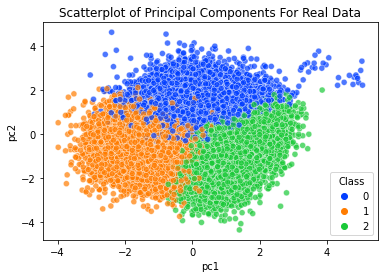

In [19]:


palette = sns.color_palette("bright", n_colors=n_clusters)
plt.title('Scatterplot of Principal Components For Real Data') 
plt.xlabel('pc1')
plt.ylabel('pc2')
sns.scatterplot(x='pc1', y='pc2', hue='Class', data=actual_projected, palette=palette, legend='full', alpha=0.7)


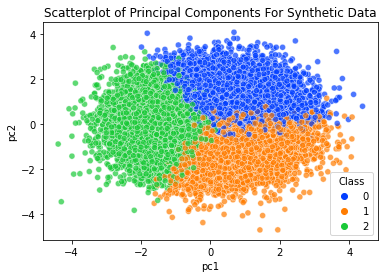

In [20]:
palette = sns.color_palette("bright", n_colors=n_clusters)
plt.title('Scatterplot of Principal Components For Synthetic Data') 
plt.xlabel('pc1')
plt.ylabel('pc2')
sns.scatterplot(x='pc1', y='-pc2', hue='Class', data=gen_projected, palette=palette, legend='full', alpha=0.7)

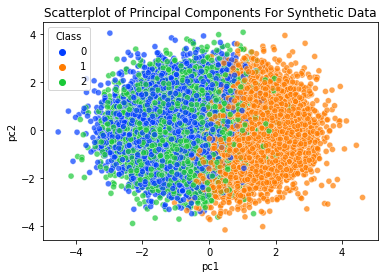

In [21]:
palette = sns.color_palette("bright", n_colors=n_clusters)
plt.title('Scatterplot of Principal Components For Synthetic Data') 
plt.xlabel('pc1')
plt.ylabel('pc2')
sns.scatterplot(x='pc1', y='-pc2', hue='Class', data=gen_predicted, palette=palette, legend='full', alpha=0.7)

# Analysing Clusters of Real Data

In [22]:

path = '/content/drive/MyDrive/Data/rdata_labels3'
rdata_labels3 = torch.load(path)

In [23]:
path = '/content/drive/MyDrive/Data/rdata_labels5'
rdata_labels5 = torch.load(path)

In [24]:
path = '/content/drive/MyDrive/Data/MM_bin'
mm_bin= torch.load(path)

In [25]:
mm_bin["Clusters_3"] = rdata_labels3
mm_bin["Clusters_5"] = rdata_labels5

In [26]:
mm_bin["Clusters_5"] = mm_bin["Clusters_5"].astype("category")
mm_bin["Clusters_3"] = mm_bin["Clusters_3"].astype("category")

In [27]:
mm_bin

term,ADHD and hyperkinetic disorders,Adrenal insufficiency and Addison's disease,Alcohol dependence and related disease,Allergic and chronic rhinitis,Alopecia areata and scarring alopecia,Ankylosing spondylitis,Anxiety and phobia,Aortic aneurysm,Aplastic anaemias,Asbestosis,...,Unspecified or Rare Diabetes,Urinary Incontinence,Urolithiasis,Urticaria,Venous thromboembolism,Visual impairment and blindness,"Vitamin B12 deficiency, with and without anaemia",Vitiligo,Clusters_3,Clusters_5
patid,,,,,,,,,,,,,,,,,,,,,
210235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
210260,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2,0
210376,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
510099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
510124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178710229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0
10207110229,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3
10225610229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2


In [28]:
Cluster_0 = mm_bin.loc[mm_bin['Clusters_3'] == 0]
Cluster_0.loc['Total'] = Cluster_0.sum(numeric_only = True)
Cluster_0.loc['Percent'] = (Cluster_0.loc['Total'] / len(Cluster_0))*100





/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [29]:

precentages = Cluster_0.drop(columns=['Clusters_3', 'Clusters_5', 'Type 1 Diabetes'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages_10 = precentages.iloc[:10]
precentages_10

term
Depression                             94.405988
Unspecified or Rare Diabetes           80.883773
Type 2 Diabetes                        73.663876
Hypertension                           66.105924
Painful conditions                     53.074694
Diabetic eye disease                   52.044430
Anxiety and phobia                     46.361880
Constipation                           39.141983
Enthesopathies & synovial disorders    38.876368
Coronary heart disease                 35.970702
Name: Percent, dtype: float64

In [30]:
Cluster_1 = mm_bin.loc[mm_bin['Clusters_3'] == 1]
Cluster_1.loc['Total'] = Cluster_1.sum(numeric_only = True)
Cluster_1.loc['Percent'] = (Cluster_1.loc['Total'] / len(Cluster_1))*100

precentages = Cluster_1.drop(columns=['Clusters_3', 'Clusters_5', 'Type 1 Diabetes'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages.head(10)


term
Unspecified or Rare Diabetes                    79.124403
Type 2 Diabetes                                 62.221059
Hypertension                                    55.945292
Diabetic eye disease                            53.569793
Painful conditions                              29.611936
Enthesopathies & synovial disorders             28.964073
Coronary heart disease                          25.665860
Dermatitis (atopc/contact/other/unspecified)    24.507558
Chronic Kidney Disease                          23.467051
Constipation                                    22.204044
Name: Percent, dtype: float64

In [31]:
Cluster_2 = mm_bin.loc[mm_bin['Clusters_3'] == 2]
Cluster_2.loc['Total'] = Cluster_2.sum(numeric_only = True)
Cluster_2.loc['Percent'] = (Cluster_2.loc['Total'] / len(Cluster_2))*100
Cluster_2

precentages = Cluster_2.drop(columns=['Clusters_3', 'Clusters_5', 'Type 1 Diabetes'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages.head(10)

term
Type 2 Diabetes                       85.102217
Unspecified or Rare Diabetes          82.838568
Hypertension                          80.723741
Gastro-oesophageal reflux disease     59.082008
Painful conditions                    57.946268
Diabetic eye disease                  56.630375
Gastritis and duodenitis              50.426882
Oesophagitis and oesophageal ulcer    47.223310
Coronary heart disease                46.792512
Chronic Kidney Disease                46.173729
Name: Percent, dtype: float64

In [32]:

mm_bin.loc['Total'] = mm_bin.sum(numeric_only = True)
mm_bin.loc['Percent'] = (mm_bin.loc['Total'] / len(mm_bin))*100
mm_bin

precentages = mm_bin.drop(columns=['Clusters_3', 'Clusters_5', 'Type 1 Diabetes'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages.head(10)

term
Unspecified or Rare Diabetes           80.840128
Type 2 Diabetes                        72.955276
Hypertension                           66.884112
Diabetic eye disease                   54.069681
Painful conditions                     45.754880
Depression                             42.396837
Enthesopathies & synovial disorders    36.108228
Coronary heart disease                 35.495429
Constipation                           34.156165
Chronic Kidney Disease                 32.898443
Name: Percent, dtype: float64

# Recon Data

In [36]:
actual_data_path = '/content/drive/MyDrive/Data/MM_recon_data_lat25_beta0.2'
recon_data = torch.load(actual_data_path)

recon_data

tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 1., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)

In [34]:
mm_bin_cols = mm_bin.drop(columns=['Clusters_3', 'Clusters_5'])

In [98]:
recon_data_df = pd.DataFrame(data=recon_data.detach().numpy(), columns=mm_bin_cols.columns, dtype=None, copy=None)
recon_data_df = recon_data_df.drop(columns=['Type 1 Diabetes'])

In [99]:
recon_data_df['Clusters_3'] = gen_predicts


In [100]:
recon_data_df['Clusters_3'].value_counts()

1    13726
0    13707
2    13036
Name: Clusters_3, dtype: int64

In [101]:
recon_data_df["Clusters_3"] = rdata_labels3
recon_data_df["Clusters_3"] = recon_data_df["Clusters_3"].astype("category")

In [102]:
rCluster_0 = recon_data_df.loc[recon_data_df['Clusters_3'] == 0]
rCluster_0.loc['Total'] = rCluster_0.sum(numeric_only = True)
rCluster_0.loc['Percent'] = (rCluster_0.loc['Total'] / len(rCluster_0))*100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [103]:
rCluster_0


term,ADHD and hyperkinetic disorders,Adrenal insufficiency and Addison's disease,Alcohol dependence and related disease,Allergic and chronic rhinitis,Alopecia areata and scarring alopecia,Ankylosing spondylitis,Anxiety and phobia,Aortic aneurysm,Aplastic anaemias,Asbestosis,...,Ulcerative colitis,Unspecified or Rare Diabetes,Urinary Incontinence,Urolithiasis,Urticaria,Venous thromboembolism,Visual impairment and blindness,"Vitamin B12 deficiency, with and without anaemia",Vitiligo,Clusters_3
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
12,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
16,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
17,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
21,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40462,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
40466,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
40467,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
Total,16.000000,11.000000,1446.000000,1889.000000,0.0,0.0,5279.000000,19.00000,14.000000,5.000000,...,15.000000,10238.000000,1029.000000,54.000000,15.000000,34.000000,293.000000,32.000000,12.000000,NaN


In [104]:
precentages = rCluster_0.drop(columns=['Clusters_3'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages_10 = precentages.iloc[:10]
precentages_10

term
Depression                             93.729878
Unspecified or Rare Diabetes           82.405023
Type 2 Diabetes                        75.853187
Hypertension                           69.220863
Painful conditions                     57.574050
Diabetic eye disease                   52.986156
Anxiety and phobia                     42.490341
Coronary heart disease                 40.188345
Enthesopathies & synovial disorders    38.135866
Constipation                           37.620734
Name: Percent, dtype: float64

In [105]:
rCluster_1 = recon_data_df.loc[recon_data_df['Clusters_3'] == 1]
rCluster_1.loc['Total'] = rCluster_1.sum(numeric_only = True)
rCluster_1.loc['Percent'] = (rCluster_1.loc['Total'] / len(rCluster_1))*100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [106]:
rCluster_1

term,ADHD and hyperkinetic disorders,Adrenal insufficiency and Addison's disease,Alcohol dependence and related disease,Allergic and chronic rhinitis,Alopecia areata and scarring alopecia,Ankylosing spondylitis,Anxiety and phobia,Aortic aneurysm,Aplastic anaemias,Asbestosis,...,Ulcerative colitis,Unspecified or Rare Diabetes,Urinary Incontinence,Urolithiasis,Urticaria,Venous thromboembolism,Visual impairment and blindness,"Vitamin B12 deficiency, with and without anaemia",Vitiligo,Clusters_3
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
8,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
11,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40458,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
40464,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
40465,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1
Total,4.000000,2.000000,543.000000,1794.000000,0.0,0.0,217.000000,0.0,7.000000,0.0,...,0.0,12373.000000,358.000000,14.000000,20.000000,2.000000,269.000000,8.000000,16.000000,NaN


In [107]:
precentages = rCluster_1.drop(columns=['Clusters_3'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages_10 = precentages.iloc[:10]
precentages_10

term
Unspecified or Rare Diabetes                    80.969832
Type 2 Diabetes                                 62.528630
Hypertension                                    58.713435
Diabetic eye disease                            54.073686
Painful conditions                              32.550226
Coronary heart disease                          29.585760
Enthesopathies & synovial disorders             27.314966
Chronic Kidney Disease                          23.552124
Osteoarthritis (excl spine)                     21.202801
Dermatitis (atopc/contact/other/unspecified)    20.672731
Name: Percent, dtype: float64

In [108]:
rCluster_2 = recon_data_df.loc[recon_data_df['Clusters_3'] == 2]
rCluster_2.loc['Total'] = rCluster_2.sum(numeric_only = True)
rCluster_2.loc['Percent'] = (rCluster_2.loc['Total'] / len(rCluster_0))*100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [109]:
rCluster_2

term,ADHD and hyperkinetic disorders,Adrenal insufficiency and Addison's disease,Alcohol dependence and related disease,Allergic and chronic rhinitis,Alopecia areata and scarring alopecia,Ankylosing spondylitis,Anxiety and phobia,Aortic aneurysm,Aplastic anaemias,Asbestosis,...,Ulcerative colitis,Unspecified or Rare Diabetes,Urinary Incontinence,Urolithiasis,Urticaria,Venous thromboembolism,Visual impairment and blindness,"Vitamin B12 deficiency, with and without anaemia",Vitiligo,Clusters_3
1,0.000000,0.0,1.000000,0.000000,0.0,0.0,1.000000,1.000000,0.00000,0.0,...,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,2
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2
5,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2
6,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2
9,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40461,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2
40463,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2
40468,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2
Total,3.000000,0.0,1176.000000,1506.000000,0.0,0.0,1831.000000,9.000000,41.00000,0.0,...,0.0,10730.000000,990.000000,28.000000,0.0,31.000000,361.000000,19.000000,0.0,NaN


In [110]:
precentages = rCluster_2.drop(columns=['Clusters_3'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages_10 = precentages.iloc[:10]
precentages_10

term
Type 2 Diabetes                       89.126761
Unspecified or Rare Diabetes          86.358149
Hypertension                          85.802817
Painful conditions                    67.195171
Gastro-oesophageal reflux disease     66.382294
Diabetic eye disease                  59.557344
Gastritis and duodenitis              59.171026
Coronary heart disease                53.778672
Oesophagitis and oesophageal ulcer    48.136821
Other anaemias                        47.130785
Name: Percent, dtype: float64

# Analysing Clusters of Generated Data

In [111]:
gen_data_path = '/content/drive/MyDrive/Data/MM_gen_data_lat25_beta0.2'
gen_data = torch.load(gen_data_path)


In [112]:
gen_data_df = pd.DataFrame(data=gen_data, columns=mm_bin_cols.columns, dtype=None, copy=None)
gen_data_df = gen_data_df.drop(columns=['Type 1 Diabetes'])

In [113]:
gen_data_df['Clusters_3'] = gen_predicts

In [114]:
gen_data_df['Clusters_3'].value_counts()

1    13726
0    13707
2    13036
Name: Clusters_3, dtype: int64

In [115]:
gen_data_df["Clusters_3"] = gen_predicts
gen_data_df["Clusters_3"] = gen_data_df["Clusters_3"].astype("category")

In [116]:
gCluster_0 = gen_data_df.loc[gen_data_df['Clusters_3'] == 0]
gCluster_0.loc['Total'] = gCluster_0.sum(numeric_only = True)
gCluster_0.loc['Percent'] = (gCluster_0.loc['Total'] / len(gCluster_0))*100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [117]:
gCluster_0


term,ADHD and hyperkinetic disorders,Adrenal insufficiency and Addison's disease,Alcohol dependence and related disease,Allergic and chronic rhinitis,Alopecia areata and scarring alopecia,Ankylosing spondylitis,Anxiety and phobia,Aortic aneurysm,Aplastic anaemias,Asbestosis,...,Ulcerative colitis,Unspecified or Rare Diabetes,Urinary Incontinence,Urolithiasis,Urticaria,Venous thromboembolism,Visual impairment and blindness,"Vitamin B12 deficiency, with and without anaemia",Vitiligo,Clusters_3
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.00000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0
3,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.00000,0.00000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0
7,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.00000,0.00000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0
11,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.00000,0.00000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0
14,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.00000,0.00000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.00000,0.00000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0
40453,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.00000,0.00000,0.0,...,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0
40459,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.00000,0.0,...,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0
Total,0.0,0.0,930.000000,1694.000000,0.0,0.0,2121.000000,6.00000,46.00000,0.0,...,1.000000,11418.000000,1573.000000,124.000000,2.00000,64.000000,497.00000,66.000000,0.0,NaN


In [118]:
precentages = gCluster_0.drop(columns=['Clusters_3'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages_10 = precentages.iloc[:10]
precentages_10

term
Type 2 Diabetes                 93.988912
Hypertension                    88.743799
Unspecified or Rare Diabetes    83.294427
Painful conditions              70.666764
Coronary heart disease          62.999708
Diabetic eye disease            57.112635
Chronic Kidney Disease          52.246863
Osteoarthritis (excl spine)     50.875401
Other anaemias                  49.781150
Constipation                    48.533703
Name: Percent, dtype: float64

In [119]:
gCluster_1 = gen_data_df.loc[gen_data_df['Clusters_3'] == 1]
gCluster_1.loc['Total'] = gCluster_1.sum(numeric_only = True)
gCluster_1.loc['Percent'] = (gCluster_1.loc['Total'] / len(gCluster_1))*100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [120]:
gCluster_1

term,ADHD and hyperkinetic disorders,Adrenal insufficiency and Addison's disease,Alcohol dependence and related disease,Allergic and chronic rhinitis,Alopecia areata and scarring alopecia,Ankylosing spondylitis,Anxiety and phobia,Aortic aneurysm,Aplastic anaemias,Asbestosis,...,Ulcerative colitis,Unspecified or Rare Diabetes,Urinary Incontinence,Urolithiasis,Urticaria,Venous thromboembolism,Visual impairment and blindness,"Vitamin B12 deficiency, with and without anaemia",Vitiligo,Clusters_3
0,0.000000,0.00000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1
1,0.000000,0.00000,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1
5,0.000000,0.00000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1
8,0.000000,0.00000,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1
9,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40461,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1
40463,0.000000,0.00000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1
40465,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1
Total,15.000000,2.00000,1421.000000,1465.000000,0.0,0.0,1629.000000,0.0,2.00000,0.0,...,0.0,11360.000000,14.000000,7.000000,35.000000,0.0,156.000000,2.00000,36.000000,NaN


In [121]:
precentages = gCluster_1.drop(columns=['Clusters_3'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages_10 = precentages.iloc[:10]
precentages_10

term
Unspecified or Rare Diabetes                    82.756611
Diabetic eye disease                            52.057988
Type 2 Diabetes                                 40.482261
Hypertension                                    37.422598
Depression                                      34.217236
Enthesopathies & synovial disorders             27.959496
Erectile dysfunction                            18.685802
Dermatitis (atopc/contact/other/unspecified)    16.121512
Asthma                                          15.516865
Painful conditions                              14.591681
Name: Percent, dtype: float64

In [122]:
gCluster_2 = gen_data_df.loc[gen_data_df['Clusters_3'] == 2]
gCluster_2.loc['Total'] = gCluster_2.sum(numeric_only = True)
gCluster_2.loc['Percent'] = (gCluster_2.loc['Total'] / len(gCluster_0))*100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [123]:
gCluster_2

term,ADHD and hyperkinetic disorders,Adrenal insufficiency and Addison's disease,Alcohol dependence and related disease,Allergic and chronic rhinitis,Alopecia areata and scarring alopecia,Ankylosing spondylitis,Anxiety and phobia,Aortic aneurysm,Aplastic anaemias,Asbestosis,...,Ulcerative colitis,Unspecified or Rare Diabetes,Urinary Incontinence,Urolithiasis,Urticaria,Venous thromboembolism,Visual impairment and blindness,"Vitamin B12 deficiency, with and without anaemia",Vitiligo,Clusters_3
4,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2
12,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2
13,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2
20,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40466,0.000000,0.000000,0.000000,1.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2
40467,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2
40468,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2
Total,5.000000,1.000000,1745.000000,2243.000000,0.0,0.0,2833.000000,1.000000,8.000000,0.0,...,0.0,11180.000000,802.000000,67.00000,4.000000,16.000000,488.000000,4.000000,3.000000,NaN


In [124]:
precentages = gCluster_2.drop(columns=['Clusters_3'])
precentages = precentages.T
precentages = precentages['Percent']
precentages = precentages.sort_values(ascending=False)
precentages_10 = precentages.iloc[:10]
precentages_10

term
Unspecified or Rare Diabetes           81.552265
Type 2 Diabetes                        79.261799
Hypertension                           74.578744
Painful conditions                     58.851849
Gastritis and duodenitis               58.538187
Diabetic eye disease                   56.940696
Depression                             49.106426
Gastro-oesophageal reflux disease      48.464512
Coronary heart disease                 45.853089
Enthesopathies & synovial disorders    43.759574
Name: Percent, dtype: float64